<a href="https://colab.research.google.com/github/kokkirala/IRS-/blob/main/Word2Vec2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import string
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [29]:
nltk.download("brown")

# Preprocessing data to lowercase all words and remove single punctuation words
document = brown.sents()
data = []
for sent in document:
  new_sent = []
  for word in sent:
    new_word = word.lower()
    if new_word[0] not in string.punctuation:
      new_sent.append(new_word)
  if len(new_sent) > 0:
    data.append(new_sent)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [30]:
model = Word2Vec(sentences=data,vector_size=100, window=5, min_count=1, workers=4)

In [32]:
# Vector for word love
print("Vector for love:")
print(model.wv["love"])
print()

Vector for love:
[-1.6403809e-01  3.9378199e-01  2.5284654e-01  4.7643745e-01
 -1.7720138e-01 -7.0118576e-01  2.5075424e-01  8.3502829e-01
 -3.8254666e-01 -7.1215087e-01  1.4326231e-01 -7.9168350e-01
 -2.9142016e-01  4.4845903e-01  3.2693699e-01 -5.5046093e-01
  6.7124790e-01 -2.2715965e-01  3.7242788e-01 -1.2854687e+00
  5.4247212e-01  7.1028900e-01  6.2240988e-01 -1.6587814e-04
 -3.2554090e-01 -6.2986255e-02 -4.6491766e-01 -1.3331044e-01
 -5.2922696e-01 -3.1281623e-01  1.4084574e+00 -4.6033630e-01
  3.5300604e-01 -9.1249269e-01  2.1092364e-01  3.9847168e-01
  4.9776471e-01 -4.9669224e-01  4.3078549e-02 -9.4883007e-01
 -2.8504360e-01 -3.8486174e-01 -9.8064959e-01 -4.1348230e-02
  4.3892166e-01  3.3179617e-01 -4.8014638e-01 -3.0352598e-01
  2.9676065e-01 -2.7009511e-01  4.6800265e-01 -7.3207754e-01
 -2.5860831e-01 -2.4376343e-01  4.2467052e-01  3.4237015e-01
 -1.2401461e-02 -4.7763705e-02 -3.3404562e-01  3.8179362e-01
 -1.2404109e-01  1.0228831e-01  7.9465538e-02  6.6034210e-01
 -5.997

In [31]:
import string
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

nltk.download("brown")

# Preprocessing data to lowercase all words and remove single punctuation words
document = brown.sents()
data = []
for sent in document:
  new_sent = []
  for word in sent:
    new_word = word.lower()
    if new_word[0] not in string.punctuation:
      new_sent.append(new_word)
  if len(new_sent) > 0:
    data.append(new_sent)

# Creating Word2Vec
model = Word2Vec(sentences=data, vector_size=100, window=5, min_count=1, workers=4)


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [33]:
# Finding most similar words
print("3 words similar to car")
#similar_words = model.wv.most_similar("learning")
words = model.wv.most_similar("car", topn=3)
for word in words:
  print(word)
print()

3 words similar to car
('train', 0.9615650177001953)
('hall', 0.9479703307151794)
('step', 0.9472152590751648)



In [34]:
#Visualizing data
words = ["france", "germany", "india", "truck", "boat", "road", "teacher", "student"]

X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

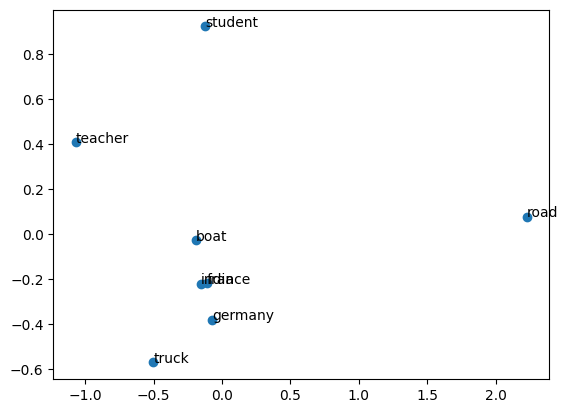

In [35]:
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()